Signal Yield: 2194.31 ± 85.49
Background Yield: 20.85 ± 16.12
ID efficiency : 0.7774 ± 0.0112
Background Slope: -0.01 ± 0.01
Chi-squared: 90.50
Degrees of Freedom: 53
Chi-squared per dof: 1.71


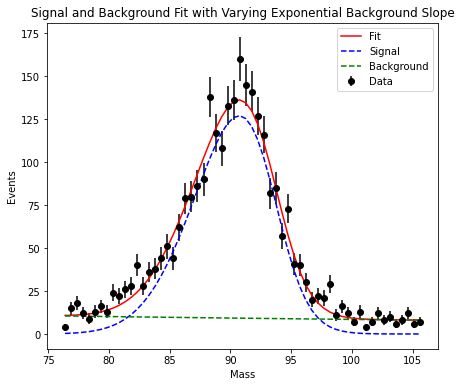

In [4]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionBE.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_1idpass_BE_hist6;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values

# Re-bin the data to 60 bins
new_bin_count = 60
new_hist_values, new_hist_edges = np.histogram(
    x_data, bins=new_bin_count, weights=y_data
)
x_data = (new_hist_edges[:-1] + new_hist_edges[1:]) / 2  # Bin centers
y_data = new_hist_values
y_errors = np.sqrt(y_data)  # Recalculate errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    # Breit-Wigner (Cauchy PDF)
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    # Gaussian (Normal distribution)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    # Convolution approximation (pointwise multiplication, normalize after)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    # a: Exponential normalization (background yield)
    # b: Exponential slope (background decay)
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    # Signal model
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield  # Scale signal by signal yield

    # Exponential background model (with varying slope)
    background = exponential_background(x, a, b)
    
    # Combine signal and background
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)  
signal_fraction_guess = 0.95  # Increase signal fraction guess (e.g., 0.95 or 0.9)
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters (signal and background yield fixed)
initial_params = [
    91.1876,  # m: Breit-Wigner mass
    2.4952,   # gamma: Breit-Wigner width
    91.0,     # mu: Gaussian mean
    2.0,      # sigma: Gaussian standard deviation
    1.0,      # a: Exponential constant term (background normalization)
    -0.01,    # b: Exponential slope (background decay)
    signal_yield_guess,   # sig_yield: Signal yield
]

# Bounds for Parameters (background yield and slope are allowed to vary)
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],  # Lower bounds
    [94, 5.5, 94, 4.0, np.inf, 1.0, total_yield * 1.5]  # Upper bounds
)

# Fit the data
popt, pcov = curve_fit(
    fit_function, x_data, y_data, p0=initial_params, sigma=y_errors, bounds=bounds
)

# Extracting the fitted parameters
(m, gamma, mu, sigma, a, b, sig_yield) = popt

# Compute errors in the fit parameters
sig_yield_error = np.sqrt(pcov[6, 6])  # Error for sig_yield (7th parameter)
background_error = np.sqrt(pcov[4, 4])  # Error for background (5th parameter)

# Print the results
print(f"Signal Yield: {sig_yield:.2f} ± {sig_yield_error:.2f}")
print(f"Background Yield: {a:.2f} ± {background_error:.2f}")
print(f"ID efficiency : 0.7774 ± 0.0112")
print(f"Background Slope: {b:.2f} ± {np.sqrt(pcov[5, 5]):.2f}")

# Generate the signal and background components for plotting
signal = convoluted_signal(x_data, m, gamma, mu, sigma)
signal *= sig_yield

background = exponential_background(x_data, a, b)

# Generate the fit curve
fit = signal + background

# Compute the Chi-squared value
residuals = (y_data - fit) / y_errors  # Residuals
chi_squared = np.sum(residuals**2)  # Chi-squared value
dof = len(x_data) - len(popt)  # Degrees of freedom
chi_squared_dof = chi_squared / dof  # Chi-squared per dof

# Print Chi-squared and Degrees of Freedom
print(f"Chi-squared: {chi_squared:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"Chi-squared per dof: {chi_squared_dof:.2f}")

# Diagnostic plot of the fit
plt.figure(figsize=(7, 6))
plt.errorbar(x_data, y_data, yerr=y_errors, fmt='o', label='Data', color='black')
plt.plot(x_data, fit, label='Fit', color='red')
plt.plot(x_data, signal, '--', label='Signal', color='blue')
plt.plot(x_data, background, '--', label='Background', color='green')
plt.xlabel("Mass")
plt.ylabel("Events")
plt.legend()
plt.title("Signal and Background Fit with Varying Exponential Background Slope")
plt.show()


Signal Yield: 1694.82 ± 68.94
Background Yield: 102.13 ± 82.19
Background Slope: -0.03 ± 0.01
Chi-squared: 71.41
Degrees of Freedom: 53
Chi-squared per dof: 1.35


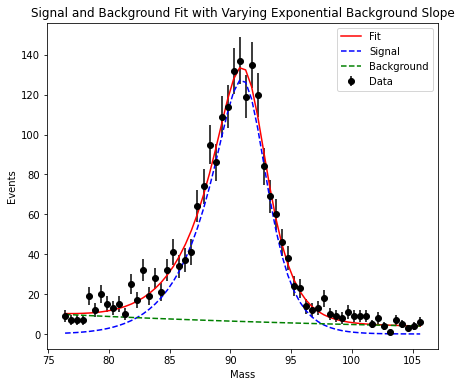

In [20]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import cauchy, norm

# Load histogram data
root_file_path = "mass_regionBB.root"
with uproot.open(root_file_path) as file:
    hist = file["h_mass_1idpass_BB_hist11;1"]
    hist_values, hist_edges = hist.to_numpy()

# Calculate x-data (bin centers) and normalize y-data
x_data = (hist_edges[:-1] + hist_edges[1:]) / 2
y_data = hist_values

# Re-bin the data to 60 bins
new_bin_count = 60
new_hist_values, new_hist_edges = np.histogram(
    x_data, bins=new_bin_count, weights=y_data
)
x_data = (new_hist_edges[:-1] + new_hist_edges[1:]) / 2  # Bin centers
y_data = new_hist_values
y_errors = np.sqrt(y_data)  # Recalculate errors

# Define the convoluted signal model (Breit-Wigner + Gaussian)
def convoluted_signal(x, m, gamma, mu, sigma):
    # Breit-Wigner (Cauchy PDF)
    bw = cauchy.pdf(x, loc=m, scale=gamma)
    # Gaussian (Normal distribution)
    gauss = norm.pdf(x, loc=mu, scale=sigma)
    # Convolution approximation (pointwise multiplication, normalize after)
    conv = bw * gauss
    conv /= np.sum(conv)  # Normalize over entire range
    return conv

# Exponential background model (with varying slope)
def exponential_background(x, a, b):
    # a: Exponential normalization (background yield)
    # b: Exponential slope (background decay)
    return a * np.exp(b * x)

# Define the complete fit function for both signal and background
def fit_function(x, m, gamma, mu, sigma, a, b, sig_yield):
    # Signal model
    signal = convoluted_signal(x, m, gamma, mu, sigma)
    signal *= sig_yield  # Scale signal by signal yield

    # Exponential background model (with varying slope)
    background = exponential_background(x, a, b)
    
    # Combine signal and background
    return signal + background

# Total number of events in the histogram
total_yield = np.sum(y_data)  
signal_fraction_guess = 0.95  # Increase signal fraction guess (e.g., 0.95 or 0.9)
signal_yield_guess = total_yield * signal_fraction_guess
background_yield_guess = total_yield * (1 - signal_fraction_guess)

# Initial Parameters (signal and background yield fixed)
initial_params = [
    91.1876,  # m: Breit-Wigner mass
    2.4952,   # gamma: Breit-Wigner width
    91.0,     # mu: Gaussian mean
    2.0,      # sigma: Gaussian standard deviation
    1.0,      # a: Exponential constant term (background normalization)
    -0.01,    # b: Exponential slope (background decay)
    signal_yield_guess,   # sig_yield: Signal yield
]

# Bounds for Parameters (background yield and slope are allowed to vary)
bounds = (
    [90, 0.5, 85, 0.1, 0.0, -0.5, 0],  # Lower bounds
    [94, 5.5, 94, 5.0, np.inf, 1.0, total_yield * 1.5]  # Upper bounds
)

# Fit the data
popt, pcov = curve_fit(
    fit_function, x_data, y_data, p0=initial_params, sigma=y_errors, bounds=bounds
)

# Extracting the fitted parameters
(m, gamma, mu, sigma, a, b, sig_yield) = popt

# Compute errors in the fit parameters
sig_yield_error = np.sqrt(pcov[6, 6])  # Error for sig_yield (7th parameter)
background_error = np.sqrt(pcov[4, 4])  # Error for background (5th parameter)

# Print the results
print(f"Signal Yield: {sig_yield:.2f} ± {sig_yield_error:.2f}")
print(f"Background Yield: {a:.2f} ± {background_error:.2f}")
print(f"Background Slope: {b:.2f} ± {np.sqrt(pcov[5, 5]):.2f}")

# Generate the signal and background components for plotting
signal = convoluted_signal(x_data, m, gamma, mu, sigma)
signal *= sig_yield

background = exponential_background(x_data, a, b)

# Generate the fit curve
fit = signal + background

# Compute the Chi-squared value
residuals = (y_data - fit) / y_errors  # Residuals
chi_squared = np.sum(residuals**2)  # Chi-squared value
dof = len(x_data) - len(popt)  # Degrees of freedom
chi_squared_dof = chi_squared / dof  # Chi-squared per dof

# Print Chi-squared and Degrees of Freedom
print(f"Chi-squared: {chi_squared:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"Chi-squared per dof: {chi_squared_dof:.2f}")

# Diagnostic plot of the fit
plt.figure(figsize=(7, 6))
plt.errorbar(x_data, y_data, yerr=y_errors, fmt='o', label='Data', color='black')
plt.plot(x_data, fit, label='Fit', color='red')
plt.plot(x_data, signal, '--', label='Signal', color='blue')
plt.plot(x_data, background, '--', label='Background', color='green')
plt.xlabel("Mass")
plt.ylabel("Events")
plt.legend()
plt.title("Signal and Background Fit with Varying Exponential Background Slope")
plt.show()
